# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from numpy import *
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
training_set = training_datagen.flow_from_directory(
    'dataset/training_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


In [14]:
training_set[0]

(array([[[[0.16862746, 0.16238776, 0.16149904],
          [0.1653867 , 0.15754357, 0.16146514],
          [0.18200438, 0.17416124, 0.17808281],
          ...,
          [0.22226064, 0.18304496, 0.17912339],
          [0.2012612 , 0.17520942, 0.16689987],
          [0.19458222, 0.17889595, 0.16713125]],
 
         [[0.16862746, 0.16238604, 0.16150245],
          [0.16538331, 0.15754017, 0.16146174],
          [0.18204352, 0.17420039, 0.17812195],
          ...,
          [0.22223683, 0.18302114, 0.17909957],
          [0.2012561 , 0.17521451, 0.16690157],
          [0.19458053, 0.17889425, 0.16712955]],
 
         [[0.16862746, 0.16238435, 0.16150583],
          [0.1653799 , 0.15753676, 0.16145833],
          [0.18208267, 0.17423953, 0.1781611 ],
          ...,
          [0.222213  , 0.1829973 , 0.17907573],
          [0.201251  , 0.17521961, 0.16690327],
          [0.19457881, 0.17889254, 0.16712783]],
 
         ...,
 
         [[0.69978464, 0.6260776 , 0.37521672],
          [0.66535

### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 2,activation = 'relu',input_shape = [64,64,3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 2,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units = 130,activation = 'relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set,validation_data = test_set,epochs = 30)

Epoch 1/30
250/250 [==============================] - 91s 365ms/step - loss: 0.3199 - accuracy: 0.8615 - val_loss: 0.4890 - val_accuracy: 0.8025
Epoch 2/30
250/250 [==============================] - 93s 372ms/step - loss: 0.3111 - accuracy: 0.8616 - val_loss: 0.4902 - val_accuracy: 0.8065
Epoch 3/30
250/250 [==============================] - 93s 371ms/step - loss: 0.3089 - accuracy: 0.8644 - val_loss: 0.5065 - val_accuracy: 0.8125
Epoch 4/30
250/250 [==============================] - 186s 747ms/step - loss: 0.3048 - accuracy: 0.8654 - val_loss: 0.5383 - val_accuracy: 0.7955
Epoch 5/30
250/250 [==============================] - 96s 382ms/step - loss: 0.2865 - accuracy: 0.8785 - val_loss: 0.4955 - val_accuracy: 0.8110
Epoch 6/30
250/250 [==============================] - 120s 478ms/step - loss: 0.2794 - accuracy: 0.8814 - val_loss: 0.4846 - val_accuracy: 0.7995
Epoch 7/30
250/250 [==============================] - 270s 1s/step - loss: 0.2793 - accuracy: 0.8730 - val_loss: 0.5178 - val_ac

### Part 4 - Making a single prediction

1/1 [==============================] - 0s 375ms/step
{'cats': 0, 'dogs': 1}


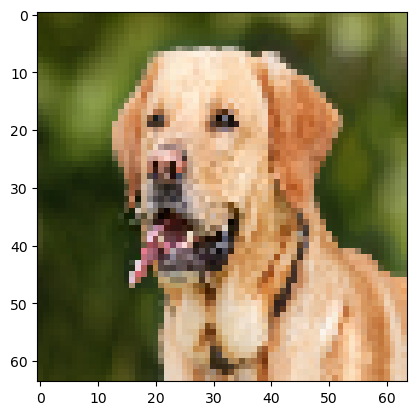

In [16]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size = (64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = expand_dims(test_image,axis = 0)
result = cnn.predict(test_image)
print(training_set.class_indices)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [17]:
print(prediction)

dog
